In [2]:
!pip install lasio

In [3]:
import lasio as ls
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib qt

In [5]:
#first step is to read the las file
las = ls.read(r"C:\Users\lanci\OneDrive\Desktop\Trainning Dta\case7 - MIT.LAS")# multifinger caliper log (MFC)

### MFT is tool used lower in the well to measure different parameter(thickness) at different deepth in the tubing
**it help the operator to know if they have Corrosion  or unwanted deposition in the tubing**, in this file we gonna focus on data labaled FING



In [10]:
#first step is to read the las file
las = ls.read(r"C:\Users\lanci\OneDrive\Desktop\Trainning Dta\case7 - MIT.LAS")# multifinger caliper log (MFC)

In [11]:
df = las.df() # lasio is built on top of pandas
df

,LSPD,LTEN,MINMK,MTTR01,MTTR02,MTTR03,MTTR04,MTTR05,MTTR06,MTTR07,...,DIAM11,DIAM12,AVEDIA,MINDIA,MAXDIA,AVERAD,MINRAD,MAXRAD,GR,CASETHCK
DEPT,,,,,,,,,,,,,,,,,,,,,
3100.000,-5.2121,40.5217,0.0,-813.0,-768.0,-654.0,-718.0,-754.0,-843.0,-902.0,...,2.4394,2.4601,2.4389,2.4095,2.4602,1.2195,1.1796,1.2571,12.6668,0.0
3100.002,-5.2121,40.5217,0.0,-813.0,-768.0,-654.0,-718.0,-754.0,-843.0,-902.0,...,2.4394,2.4601,2.4389,2.4095,2.4602,1.2195,1.1796,1.2571,12.6668,0.0
3100.004,-5.2121,40.5217,0.0,-812.0,-769.0,-652.0,-720.0,-755.0,-847.0,-907.0,...,2.4431,2.4642,2.4360,2.3917,2.4642,1.2180,1.1759,1.2557,12.6668,0.0
3100.006,-5.2121,40.5217,0.0,-812.0,-769.0,-652.0,-720.0,-755.0,-847.0,-907.0,...,2.4431,2.4642,2.4360,2.3917,2.4642,1.2180,1.1759,1.2557,12.6668,0.0
3100.008,-5.2121,40.5217,0.0,-812.0,-769.0,-652.0,-720.0,-755.0,-847.0,-907.0,...,2.4712,2.4682,2.4399,2.3937,2.4712,1.2200,1.1759,1.2648,12.6668,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204.992,-1.8075,40.5217,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3204.994,-1.8075,40.5217,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3204.996,-1.8075,40.5217,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [12]:
#to read the title of the different columns that i have 
df.columns

Index(['LSPD', 'LTEN', 'MINMK', 'MTTR01', 'MTTR02', 'MTTR03', 'MTTR04',
       'MTTR05', 'MTTR06', 'MTTR07',
       ...
       'DIAM11', 'DIAM12', 'AVEDIA', 'MINDIA', 'MAXDIA', 'AVERAD', 'MINRAD',
       'MAXRAD', 'GR', 'CASETHCK'],
      dtype='object', length=105)

C:\Users\lanci\AppData\Local\Temp\ipykernel_20192\3509744714.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["new_thichness"] = outter_diameter - df.AVEDIA
C:\Users\lanci\AppData\Local\Temp\ipykernel_20192\3509744714.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["manufac_thickness"] = manufac_thickness
C:\Users\lanci\AppData\Local\Temp\ipykernel_20192\3509744714.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

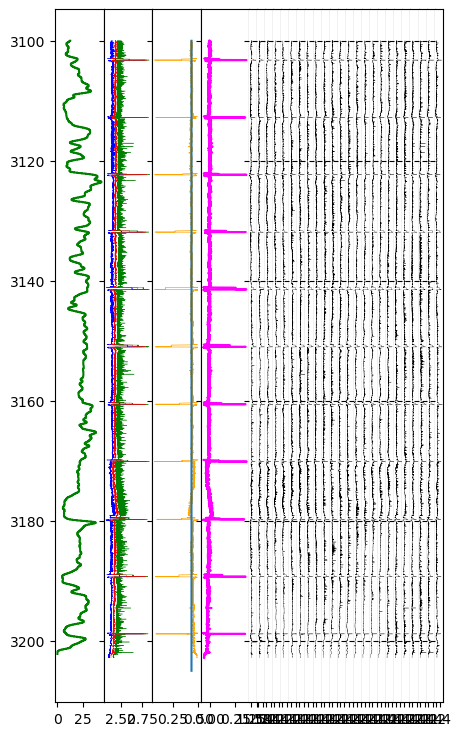

In [13]:
#loop through all columns
fingers = []
for c in df.columns:
    if c.startswith("FING"):
        fingers.append(c)
        
#we gonna be plotting different parameter ( Gamma Ray,[min,max,av.],calculation column,FING column[containing 24 colomns])
grid_size = [30,30,30,30]+[5]*24
fig, ax = plt.subplots (1,28, sharey = True, gridspec_kw = {'width_ratios':grid_size},figsize =(5,9)) #the sharey is set as True to allow the plot to sink up otherwise it will look horrible
fig.subplots_adjust(wspace = 0)

#Adding gamma ray
ax[0].plot(df.GR,df.index, label= "GR",color= "green")
ax[0].invert_yaxis() #to revert the the depth value lower-higher

#Adding aggredeted curve(min,max, ....)
ax[1].plot(df.MINDIA,df.index, label= "MinDia",color= "blue", lw=0.3)
ax[1].plot(df.MAXDIA,df.index, label= "MaxDia",color= "green", lw=0.3)
ax[1].plot(df.AVEDIA,df.index, label= "AvrDia",color= "red", lw=0.3)


#Creat a calculation #but first let view the inner diameter of the tubing in other to know if u won or lost some thichness
inner_diameter = 2.441 
outter_diameter = 2.875
manufac_thickness = outter_diameter - inner_diameter #inches
manufac_thickness 
df["new_thichness"] = outter_diameter - df.AVEDIA 
df["manufac_thickness"] = manufac_thickness
ax[2].plot(df["new_thichness"],df.index, label= "Remaining thickness",color= "orange", lw=0.5)
ax[2].plot(df["manufac_thickness"],df.index, label= "Manufacture thickness")

#Calculate the lost of metal (strenght)
df["lost_metal (in)"] = df["manufac_thickness"]-df["new_thichness"]
df["%lost"] = (df["lost_metal (in)"]/df["manufac_thickness"])*100   #lost of strenght in porcentage
ax[3].plot(df["lost_metal (in)"],df.index, color= "magenta")


#plot the fingers(24)
for i in range(0,24):
    ax[i + 4].plot(df[fingers[i]],df.index , color = "black", lw=0.2)
    ax[i + 4].spines.right.set_visible(True)
    ax[i + 4].spines.left.set_visible(False)
    
    